In [1]:
import os
import numpy as np
import tensorflow as tf

os.chdir("/home/num_24/桌面/mywork/github/TFDeepSurv")
os.getcwd()

np.random.seed(10)

from dataset import SimulatedData
import L2DeepSurv as LDS

data_config = SimulatedData(2000, num_var = 2, num_features = 10)
data = data_config.generate_data(2000)

In [2]:
n_features = data['x'].shape[1]
print("features: ", n_features)
model = LDS.L2DeepSurv(data['x'], {'e': data['e'], 't': data['t']},
                      n_features, [6, 3], 1, 
                      learning_rate=0.2,
                      activation='relu', 
                      L1_reg=0.0002, 
                      L2_reg=0.0003, 
                      optimizer='adam')
print(model.train_data['ties'] )

features:  10
noties


-------------------------------------------------
training steps 1:
loss = 7.08073.

CI = 0.504803.

-------------------------------------------------
training steps 101:
loss = 7.08064.

CI = 0.525917.

-------------------------------------------------
training steps 201:
loss = 7.08055.

CI = 0.528815.

-------------------------------------------------
training steps 301:
loss = 7.08046.

CI = 0.534499.

-------------------------------------------------
training steps 401:
loss = 7.08035.

CI = 0.543107.

-------------------------------------------------
training steps 501:
loss = 7.08016.

CI = 0.554087.

-------------------------------------------------
training steps 601:
loss = 7.07968.

CI = 0.573222.

-------------------------------------------------
training steps 701:
loss = 7.07699.

CI = 0.606653.

-------------------------------------------------
training steps 801:
loss = 7.03317.

CI = 0.65244.

-------------------------------------------------
training steps 901:
loss =

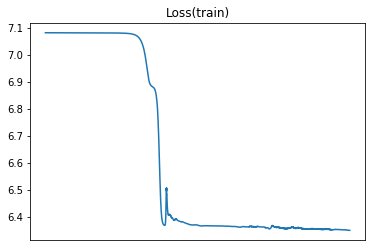

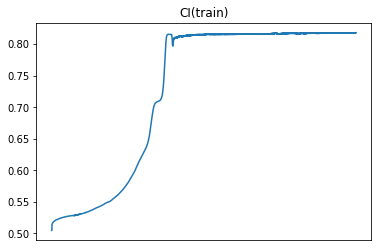

In [3]:
model.train(num_epoch=2500, iteration=100,
            plot_train_loss=True, plot_train_CI=True)

In [4]:
X = data['x']
label = {'e': data['e'], 't': data['t']}
print("CI on train set: %g" % model.eval(X, label))

# 生成测试集数据
test_data = data_config.generate_data(800)
sort_idx = np.argsort(test_data['t'])[::-1]
test_data['x'] = test_data['x'] [sort_idx]
test_data['e'] = test_data['e'] [sort_idx]
test_data['t'] = test_data['t'] [sort_idx]
test_X = test_data['x']
test_label = {'e': test_data['e'], 't': test_data['t']}
print("CI on train set: %g" % model.eval(test_X, test_label))

CI on train set: 0.817717
CI on train set: 0.813821


In [5]:
model.evaluate_var_byWeights()

0th feature score : -0.0427295.
1th feature score : 1.
2th feature score : 0.0100278.
3th feature score : -0.020157.
4th feature score : -0.213659.
5th feature score : 0.00779494.
6th feature score : 0.328767.
7th feature score : -0.0759722.
8th feature score : 0.0515076.
9th feature score : 0.106244.


array([-0.04272946,  1.        ,  0.01002778, -0.02015701, -0.21365936,
        0.00779494,  0.32876679, -0.07597221,  0.05150763,  0.1062442 ], dtype=float32)

In [6]:
[model.sess.run(w) for w in model.nnweights]

[array([[-0.21328406,  1.78190005,  0.10777041, -1.6367563 , -0.24023001,
         -0.0629805 ],
        [-0.42153907, -0.92590028, -0.40231463, -1.41113472,  2.03910422,
          0.13899639],
        [-0.16405948, -0.03169267, -0.1163133 , -0.01815065,  0.02260805,
         -0.25151774],
        [-0.18665132, -0.07543458, -0.11398401, -0.06192507, -0.05131284,
          0.14991036],
        [ 0.07059152, -0.12352715, -0.38230145, -0.08863649,  0.03108068,
         -0.03499667],
        [-0.04710085,  0.00852015, -0.00415107, -0.03741465, -0.0319171 ,
          0.19249275],
        [-0.40491682,  0.04951339,  0.3716765 , -0.09995412,  0.01275348,
          0.11899771],
        [-0.05350206, -0.04238999, -0.19282423, -0.01669576,  0.00232662,
         -0.14439563],
        [-0.09637763,  0.02215778,  0.06289692, -0.07092812, -0.04040873,
          0.28315488],
        [-0.1392567 ,  0.03041203,  0.07188811, -0.02096449,  0.01922358,
         -0.02936389]], dtype=float32),
 array([[ -4.

In [6]:
model.evaluate_var_byInputPerturbation()

array([ 0.63383087,  0.61940233,  0.62775267,  0.64784342,  0.69984079,
        0.69290818,  0.6882138 ,  0.69923669,  0.6997215 ,  0.69980103])

In [7]:
model.evaluate_var_byOneWeight()

array([ 0.1784015 ,  0.17542262,  0.17520671,  0.15463383,  0.00667036,
        0.07382113,  0.17494449,  0.03679878,  0.01540109,  0.0086995 ], dtype=float32)

### 出现ties

使用出现Ties的模拟数据测试：

In [2]:
data['t'][400:480] = np.round(data['t'][400:480] , 3)
print(data['t'][400:480])
print(data['e'][400:480])

[ 0.29699999  0.287       0.285       0.28200001  0.27599999  0.25099999
  0.25        0.25        0.248       0.24600001  0.243       0.243       0.242
  0.23899999  0.23        0.22        0.21799999  0.215       0.208       0.204
  0.2         0.19599999  0.19599999  0.19400001  0.186       0.186       0.175
  0.16599999  0.162       0.16        0.15800001  0.15700001  0.153       0.153
  0.15000001  0.149       0.146       0.14300001  0.14300001  0.138
  0.13600001  0.12800001  0.12800001  0.122       0.115       0.102       0.098
  0.093       0.092       0.091       0.082       0.08        0.074       0.074
  0.073       0.071       0.067       0.066       0.065       0.065       0.064
  0.063       0.063       0.061       0.058       0.055       0.054       0.051
  0.049       0.047       0.047       0.045       0.041       0.041       0.038
  0.036       0.036       0.034       0.032       0.032     ]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1

In [3]:
n_features = data['x'].shape[1]
print("features: ", n_features)
model = LDS.L2DeepSurv(data['x'], {'e': data['e'], 't': data['t']},
                      n_features, [6, 3], 1, 
                      learning_rate=0.001,
                      activation='tanh', 
                      L1_reg=0.01, 
                      L2_reg=0.01, 
                      optimizer='sgd')

features:  10


-------------------------------------------------
training steps 1:
loss = 2100.59.

CI = 0.459211.

-------------------------------------------------
training steps 51:
loss = 2100.45.

CI = 0.479909.

-------------------------------------------------
training steps 101:
loss = 2100.4.

CI = 0.502478.

-------------------------------------------------
training steps 151:
loss = 2100.34.

CI = 0.531178.

-------------------------------------------------
training steps 201:
loss = 2100.18.

CI = 0.552379.

-------------------------------------------------
training steps 251:
loss = 2099.41.

CI = 0.563483.

-------------------------------------------------
training steps 301:
loss = 2095.12.

CI = 0.567548.

-------------------------------------------------
training steps 351:
loss = 2092.85.

CI = 0.568279.

-------------------------------------------------
training steps 401:
loss = 2092.27.

CI = 0.568107.

-------------------------------------------------
training steps 451:
loss = 

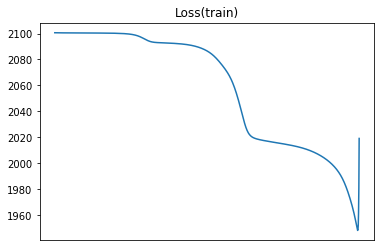

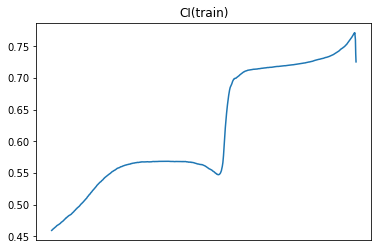

In [4]:
model.train(num_epoch=1000, iteration=50,
            plot_train_loss=True, plot_train_CI=True)